In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import schedule

Flowerbed1: 585 feature vectors
Flowerbed2: 144 feature vectors
Flowerbed3: 149 feature vectors
Flowerbed4: 108 feature vectors
Flowerbed6: 131 feature vectors
Flowerbed7: 144 feature vectors
Flowerbed8: 148 feature vectors


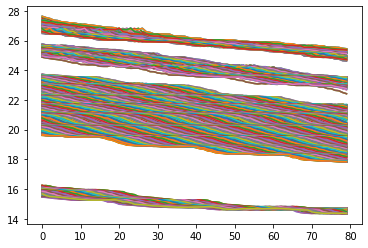

In [22]:
# read data fusion's feature vectors and moisture device sensors, to construct x_train and y_train

for N in [0, 1, 2, 3, 5, 6, 7]:
    folder = '../data/New_folder1/'
    files = ['features_carouge_1.json',
            'features_carouge_2.json',
            'features_carouge_3.json',
            'features_carouge_4.json',
            'features_carouge_5.json',
            'features_carouge_6.json',
            'features_carouge_7.json',
            'features_carouge_8.json']

    with open(folder + files[N], 'r') as f:
        lines = f.readlines()

    f_t = []
    f_ftr = []
    for idx, l in enumerate(lines[1:]):
        f_t.append(json.loads(l)['timestamp'])
        f_ftr.append(json.loads(l)['ftr_vector'])

        #print(f_ftr)
        #break

    files_device = [
        'carouge_device_1f0d.csv',
        'carouge_device_1f08.csv',
        'carouge_device_1f10.csv',
        'carouge_device_1f06.csv',
        'carouge_device_1f0d.csv',
        'carouge_device_1eff.csv',
        'carouge_device_1f02.csv',
        'carouge_device_1efe.csv'
    ]
    #print(files_device[N])
    data = pd.read_csv(folder + files_device[7])
    data = data.drop_duplicates(subset = 'time', keep = 'first')

    w_old = pd.read_csv(folder + 'carouge_WeatherObserved.csv')

    w_00 = pd.read_csv(folder + 'carouge_weather_forecast_environmental00.csv')
    w_01 = pd.read_csv(folder + 'carouge_weather_forecast_environmental01.csv')
    w_02 = pd.read_csv(folder + 'carouge_weather_forecast_environmental02.csv')
    w_03 = pd.read_csv(folder + 'carouge_weather_forecast_environmental03.csv')
    w_10 = pd.read_csv(folder + 'carouge_weather_forecast_environmental10.csv')
    w_11 = pd.read_csv(folder + 'carouge_weather_forecast_environmental11.csv')
    w_12 = pd.read_csv(folder + 'carouge_weather_forecast_environmental12.csv')
    w_13 = pd.read_csv(folder + 'carouge_weather_forecast_environmental13.csv')
    
    profiles = []
    f_time = []
    f_ftrv = []

    for i, dt in enumerate(f_t):
        minidx = (abs(dt/1000 - data['time'])).idxmin()
        minidx_w = (abs(dt/1000 - w_old['stampm'])).idxmin()

        if(abs(dt/1000 - data['time'][minidx])<3600):
            if((abs(dt/1000 - w_old['stampm'][minidx_w]))<100000):
                profiles.append(data['value'].values[minidx:minidx+80*6][::6])  #every 2nd sample is added to the profile(40 min increments)
                f_time.append(dt)
                vector = f_ftr[i]
                vector = np.concatenate([vector, w_old.iloc[minidx_w].values[1:]])
            f_ftrv.append(vector)
    #print(len(profiles))
    
    fv_tosend = []
    profiles_tosend = []
    
    def ascends(series):
        asc = True
        for i in range(5, len(series)):
            if(series[i]>series[i-5] + 2):
                asc = False
        return(asc)

    for i in range(len(f_time)):
        if((len(profiles[i])==80)and(profiles[i][-1]<profiles[i][0])):
            
            if(not np.isnan(profiles[i]).any() and (ascends(profiles[i]))):
                fv_tosend.append(np.array(f_ftrv[i]))
                profiles_tosend.append(profiles[i])

    #fv_tosend = np.array(fv_tosend)
    #profiles_tosend = np.array(profiles_tosend)

    print(f'Flowerbed{N+1}: {len(profiles_tosend)} feature vectors')
    for prof in profiles_tosend:
        plt.plot(prof)
    
    try:
        d = np.array([0, 0], dtype = object)
        d[1] = np.array(profiles_tosend)/30
        #print(np.array(fv_tosend).shape)
        #print(fv_tosend)
        d[0] = np.array(np.array(fv_tosend)[:, :7])/30
        #print(d[0].shape)
        #print(d[1].shape)
    except:
        pass
    

    
    #np.save(f'flowerbed{N+1}_160h_new.npy',d, allow_pickle = True)



In [ ]:
view = pd.read_csv(folder + 'carouge_device_1f0d.csv')
display(view)

fig, ax = plt.subplots(1, 1, figsize = (15, 4))
ax.plot(pd.to_datetime(view['time'], unit = 's'), view['value'])
#ax.hlines(25, pd.to_datetime(view['time'].values, unit = 's')[0], pd.to_datetime(view['time'], unit = 's')[48000], color = 'r')

In [ ]:
plt.plot(data['value'])

In [ ]:
data = data.drop_duplicates(subset = 'time', keep = 'first')

print(pd.to_datetime(data['time'], unit = 's'))